In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\student_discipline.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,Category,Rowstatus,Students,Enrollment,PctEnrollment,Incidents,AvgDuration
0,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,1st Grade,All Students,All Students,Hispanic/Latino/1st Grade,In-School Suspension,REPORTED,18.0,2133.0,0.84,27.0,1.00
1,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,1st Grade,All Students,All Students,Hispanic/Latino/1st Grade,Out-of-School Suspension,REPORTED,23.0,2133.0,1.08,40.0,1.45
2,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,1st Grade,All Students,All Students,Hispanic/Latino/1st Grade,"Out-of-School Suspension, No CDAP Placement",REPORTED,23.0,2133.0,1.08,40.0,1.45
3,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,2nd Grade,All Students,All Students,Hispanic/Latino/2nd Grade,In-School Suspension,REPORTED,16.0,1898.0,0.84,22.0,1.04
4,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,2nd Grade,All Students,All Students,Hispanic/Latino/2nd Grade,Out-of-School Suspension,REPORTED,22.0,1898.0,1.16,44.0,1.34


In [3]:
# Check for missing values
df.isnull().sum()

School Year           0
District Code         0
District              0
School Code           0
Organization          0
Race                  0
Gender                0
Grade                 0
SpecialDemo           0
Geography             0
SubGroup              0
Category              0
Rowstatus             0
Students         671446
Enrollment       432251
PctEnrollment    798697
Incidents        671446
AvgDuration      671446
dtype: int64

In [5]:
# Convert 'School Year' to string for consistency
df['School Year'] = df['School Year'].astype(str)

# Fill missing values in numeric columns with 0
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Verify data types
df.dtypes

School Year       object
District Code      int64
District          object
School Code        int64
Organization      object
Race              object
Gender            object
Grade             object
SpecialDemo       object
Geography         object
SubGroup          object
Category          object
Rowstatus         object
Students         float64
Enrollment       float64
PctEnrollment    float64
Incidents        float64
AvgDuration      float64
dtype: object

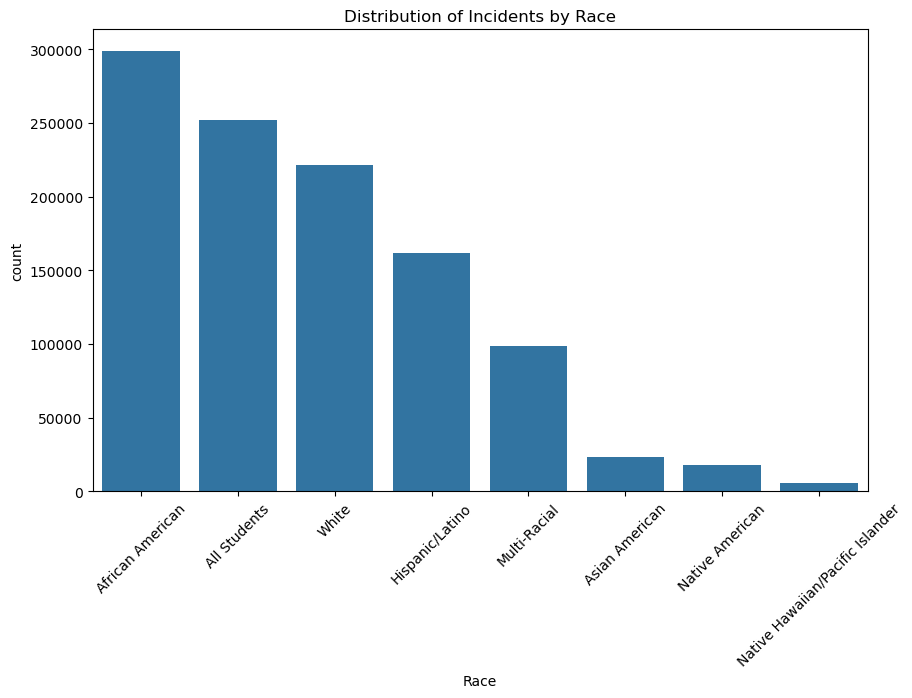

In [7]:
# Distribution of incidents by race
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Race', order=df['Race'].value_counts().index)
plt.title('Distribution of Incidents by Race')
plt.xticks(rotation=45)
plt.show()

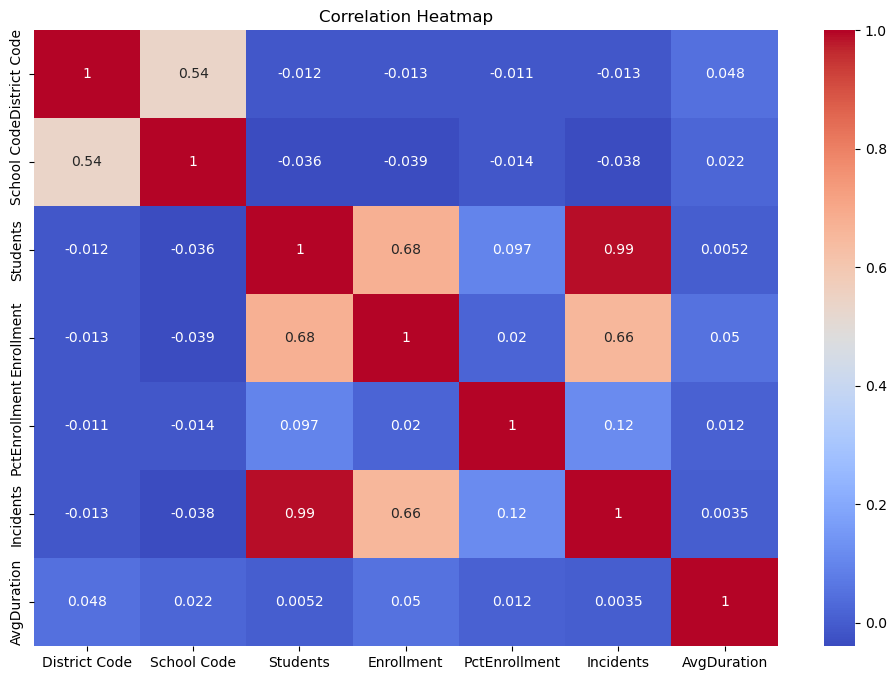

In [9]:
# Heatmap of correlations between numeric variables
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data for modeling
features = ['Enrollment', 'PctEnrollment', 'AvgDuration']
X = df[features]
y = df['Incidents']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse